##importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/iris.csv')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum() 

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


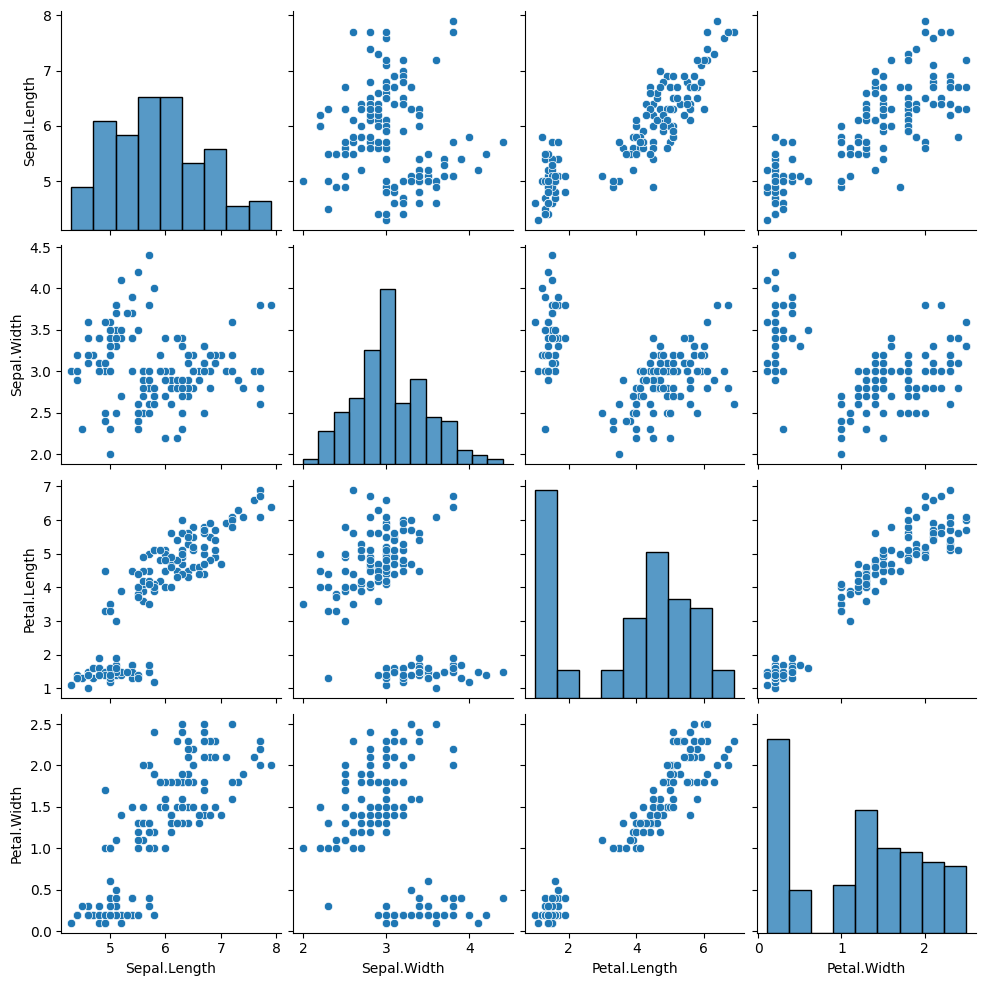

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


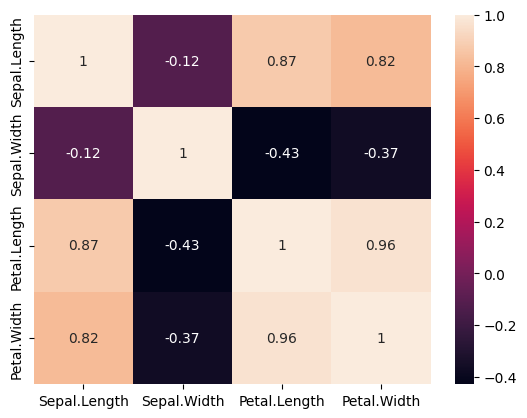

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
spec={'setosa':1,'versicolor':2, 'virginica':3}
df.Species=[spec[i] for i in df.Species]
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [11]:
x=df.iloc[:,0:4]
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y=df.iloc[:,4]
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
model=LinearRegression()

In [14]:
model.fit(x,y)

LinearRegression()

In [15]:
model.score(x,y)  

0.9303939218549564

In [16]:
model.coef_

array([-0.11190585, -0.04007949,  0.22864503,  0.60925205])

In [17]:
model.intercept_

1.1864952472062478

In [18]:
y_pred=model.predict(x_test)

In [19]:
print("Mean Squared Error: %.2f" % np.mean((y_pred - y_test)**2))

Mean Squared Error: 0.04


In [20]:
from sklearn.naive_bayes import GaussianNB
accuracies={}
nb = GaussianNB()
nb.fit(x_train, y_train)
acc=nb.score(x_test,y_test)*100
accuracies['Naive Bayes']=acc
print("Accuracy Of Naive Bayes:{:.2f}%".format(acc))

Accuracy Of Naive Bayes:96.00%


In [21]:
nb.score(x_train,y_train)*100

95.0

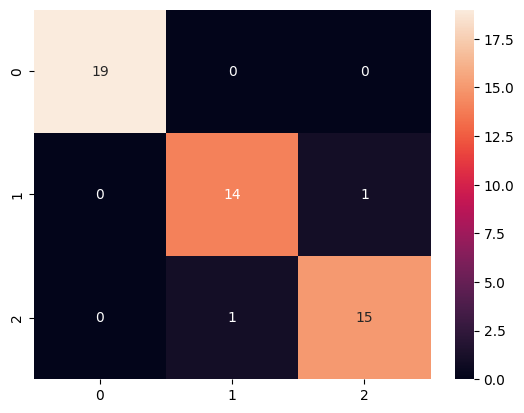

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
predictions = nb.predict(x_test)
predictions
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.show()